# Pandas

In [2]:
import pandas as pd
import numpy as np

## Creating data

In [8]:
filename = './pandasData.csv'
with open(filename, "w") as f:
    f.write("x;y\n")
    x = np.random.normal(0, 2, 1000)
    y = np.random.normal(100, 10, 1000)
    for i in range(1000):
        line = "%d; %d \n" % (x[i], y[i])
        f.write(line)

## Getting data

In [9]:
data = pd.read_csv(filename, sep=';')
data.head(10)

,x,y
0,1,104
1,1,113
2,0,97
3,0,94
4,0,108
5,3,92
6,4,113
7,-1,113
8,1,102
9,-2,105


## Queries and filter

In [10]:
data[data['y'] > 120]
data.query('y > 120')

,x,y
88,0,122
149,3,124
229,1,124
365,-1,125
388,2,125
402,0,122
436,-2,121
481,0,124
573,0,122
582,2,125


In [11]:
data['y'].sum()

98865

In [12]:
data[:20]

,x,y
0,1,104
1,1,113
2,0,97
3,0,94
4,0,108
5,3,92
6,4,113
7,-1,113
8,1,102
9,-2,105


## Pandas plot

In [13]:
data['y'].plot()


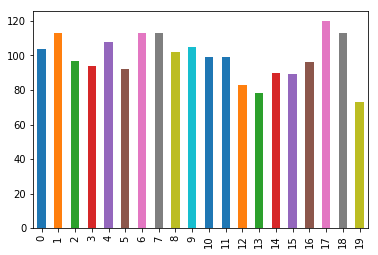

In [14]:
data[:20]['y'].plot(kind='bar')

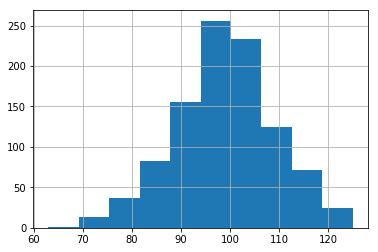

In [15]:
data['y'].hist()

# Data Manipulation with Pandas

In [ ]:
# Default configuration for using auto completion with tab key
%config IPCompleter.greedy=True

In [16]:
import pandas
pandas.__version__

'0.22.0'

In [21]:
import pandas as pd 
# provides an efficient implementation of a DataFrame. DataFrames 
# multidimensional arrays with attached row and column labels

In [22]:
pd?

In [23]:
pd.*?

## The Pandas Series Object

In [25]:
import numpy as np

data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [26]:
data.values # NumPy array

array([0.25, 0.5 , 0.75, 1.  ])

In [27]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [28]:
data[1] # like with NumPy

0.5

In [29]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### Series as generalized NumPy array

In [30]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [31]:
data['b']

0.5

In [32]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7]) # non sequential indices
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series as specialized dictionary

In [33]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [34]:
population['California']

38332521

In [36]:
population['California':'Illinois'] # like indices

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

In [37]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [38]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [39]:
pd.Series({2:'a', 1:'b', 3:'c'})


1    b
2    a
3    c
dtype: object

In [40]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

## The Pandas DataFrame Object

### DataFrame as a generalized NumPy array

If a *Series* is an analog of a one-dimensional array with flexible indices, a *DataFrame* is an analog of a two-dimensional array with both flexible row indices and flexible column names.

A *DataFrame* can be represented as a sequence of aligned *Series* objects

In [41]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area # new Series listing the area of each of the five states

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [43]:
states = pd.DataFrame({'population': population,
                       'area': area})
states # data frame which contains area and population of each state

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [45]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [46]:
states.columns

Index(['area', 'population'], dtype='object')

### DataFrame as specialized dictionary

In [47]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

### Constructing DataFrame objects
#### From a single Series object

In [55]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


#### From a list of dicts

In [56]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [58]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


#### From a dictionary of Series objects

In [60]:
pd.DataFrame({'population': population,
              'area': area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


#### From a two-dimensional NumPy array

In [63]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.038428,0.645133
b,0.664990,0.525097
c,0.966153,0.519781


#### From a NumPy structured array

In [64]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [65]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## The Pandas Index Object

In [68]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

### Index as immutable array

In [70]:
ind[1] # Index as immutable array


3

In [71]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [72]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [73]:
ind[1] = 0

TypeError: Index does not support mutable operations

### Index as ordered set

In [75]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
indA & indB  # intersection